# Linear models for classification

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Intro to classification

In [2]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

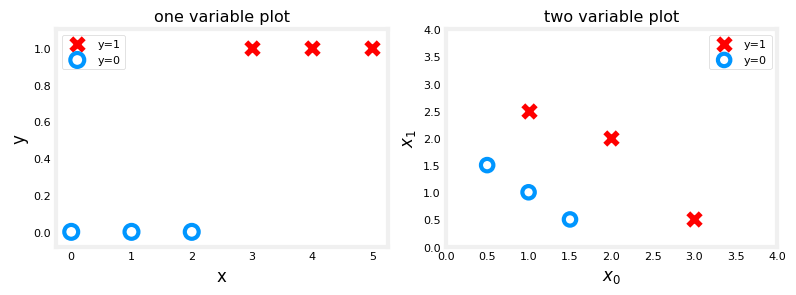

In [3]:
from helpers.lab_utils_common_lc import dlc, plot_data
from helpers.plt_one_addpt_onclick import plt_one_addpt_onclick

plt.style.use('helpers/deeplearning.mplstyle')

pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

#plot 2, two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()

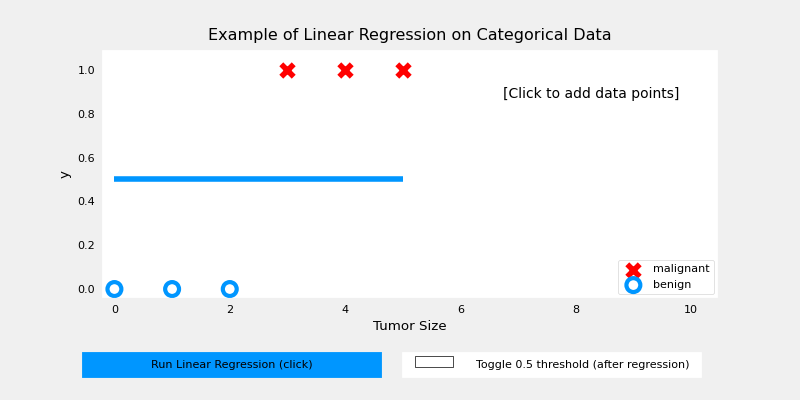

In [4]:
%matplotlib widget
w_in = np.zeros((1))
b_in = 0
plt.close('all') 
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=False)

## Logistic Regression

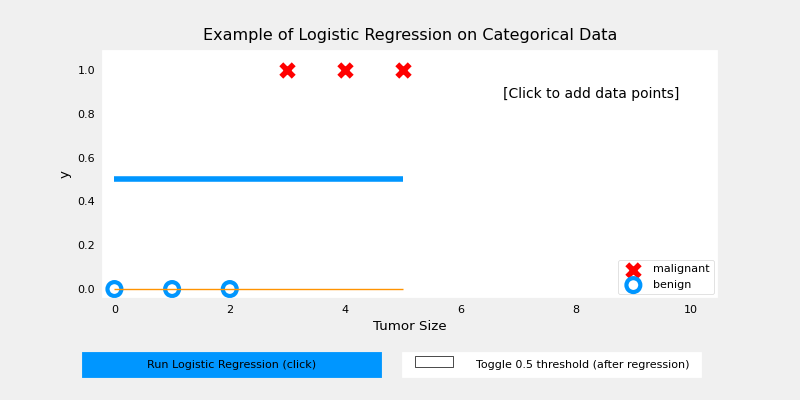

In [5]:
plt.close('all') 
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=True)

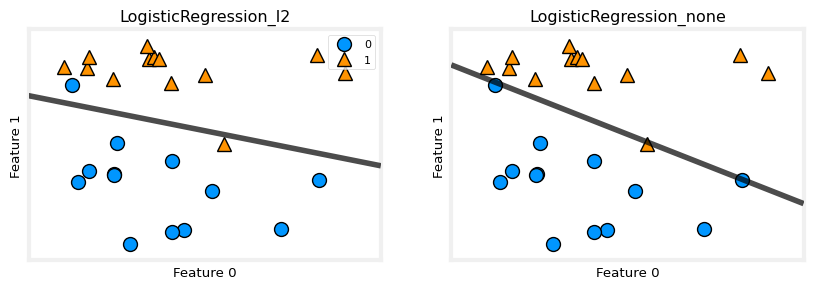

In [7]:
from helpers.datasets import make_forge
from helpers.plot_2d_separator import plot_2d_separator
from helpers.plot_helpers import discrete_scatter

from sklearn.linear_model import LogisticRegression
%matplotlib inline

X, y = make_forge()

model = LogisticRegression()
clf = model.fit(X, y)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LogisticRegression(), LogisticRegression(penalty="none")], axes):
    clf = model.fit(X, y)
    plot_2d_separator(clf, X, fill=False, eps=0.5,ax=ax, alpha=.7)
    discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{clf.__class__.__name__}_{clf.penalty}")
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
axes[0].legend()
plt.show()

**Types of Logistic Regression**:
- `Binary Logistic Regression`: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.
- `Multinomial Logistic Regression`: The target variable has three or more nominal categories such as predicting the type of Wine.
- `Ordinal Logistic Regression`: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.

**Advantages**:
- Because of its efficient and straightforward nature, it doesn't require high computation power, is easy to implement, easily interpretable, and used widely by data analysts and scientists.
- Also, it doesn't require scaling of features (it's faster with scaling). 
- Logistic regression provides a probability score for observations.

**Disadvantages**:
- Logistic regression is **not able to handle a large number of categorical** features/variables.
- It is **vulnerable to overfitting**.
- Also, **can't solve the non-linear problem** with the logistic regression that is why it requires a transformation of non-linear features (Polynomial features?).
- Logistic regression will **not perform well with independent variables that are not correlated to the target variable** and are very similar or correlated to each other.


## Regularization for Logistic Regression

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=10000).fit(X_train_scaled, y_train)

print(f"Training set score: {logreg.score(X_train_scaled, y_train):.3f}")
print(f"Test set score: {logreg.score(X_test_scaled, y_test):.3f}")

Training set score: 0.988
Test set score: 0.986


In [11]:
logreg100 = LogisticRegression(max_iter=10000, C=100).fit(X_train_scaled, y_train)

print(f"Training set score: {logreg100.score(X_train_scaled, y_train):.3f}")
print(f"Test set score: {logreg100.score(X_test_scaled, y_test):.3f}")

Training set score: 0.995
Test set score: 0.951


In [12]:
logreg001 = LogisticRegression(max_iter=10000, C=0.01).fit(X_train_scaled, y_train)

print(f"Training set score: {logreg001.score(X_train_scaled, y_train):.3f}")
print(f"Test set score: {logreg001.score(X_test_scaled, y_test):.3f}")

Training set score: 0.958
Test set score: 0.937


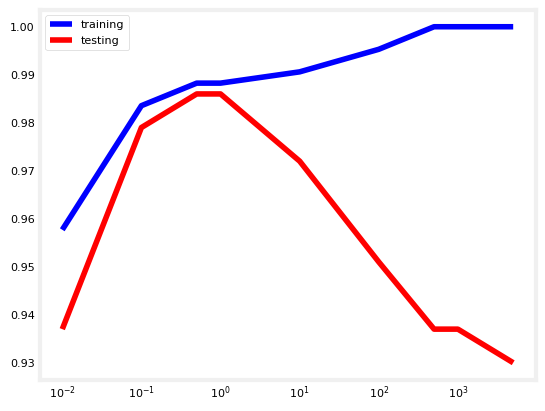

In [13]:
traning_scores = {}
testing_scores = {}

c_values = [0.01, 0.1, 0.5, 1, 10, 100, 500, 1000, 5000]

for c in c_values:
    logreg_diff = LogisticRegression(C=c, max_iter=100000).fit(X_train_scaled, y_train)
    traning_scores[c] = logreg_diff.score(X_train_scaled, y_train)
    testing_scores[c] = logreg_diff.score(X_test_scaled, y_test)
    
plt.plot(traning_scores.keys(), traning_scores.values(), c="blue", label="training")
plt.plot(testing_scores.keys(), testing_scores.values(), c="red", label="testing")
plt.legend()
plt.xscale('log')
plt.show()

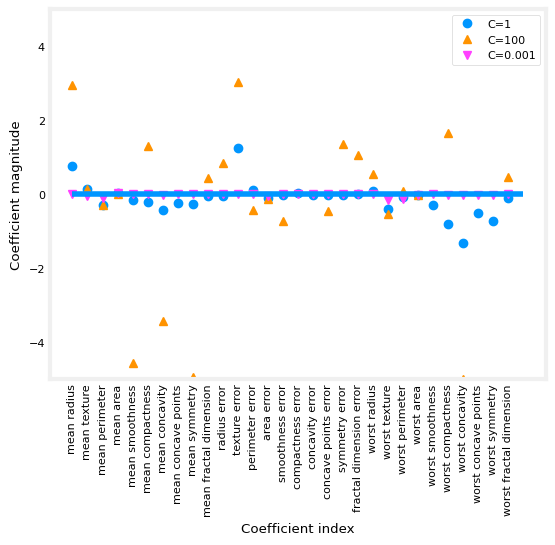

In [14]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
logreg100 = LogisticRegression(max_iter=10000, C=100).fit(X_train, y_train)
logreg001 = LogisticRegression(max_iter=10000, C=0.01).fit(X_train, y_train)

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

Training accuracy of l1 logreg with C=0.001: 0.37
Test accuracy of l1 logreg with C=0.001: 0.37
Training accuracy of l1 logreg with C=1.000: 0.99
Test accuracy of l1 logreg with C=1.000: 0.99
Training accuracy of l1 logreg with C=100.000: 1.00
Test accuracy of l1 logreg with C=100.000: 0.94


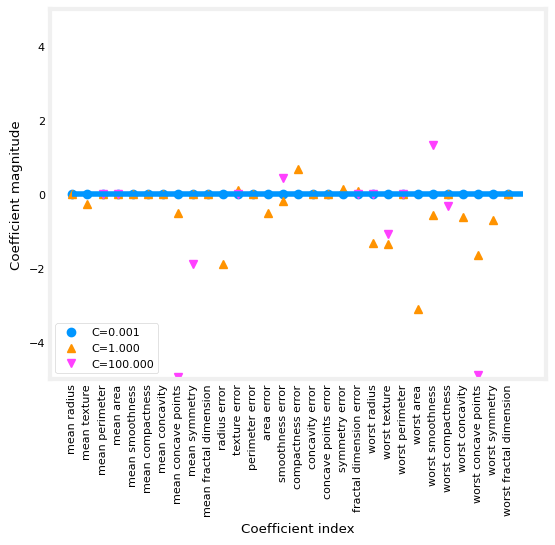

In [15]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear").fit(X_train_scaled, y_train)
    print(f"Training accuracy of l1 logreg with C={C:.3f}: {lr_l1.score(X_train_scaled, y_train):.2f}")
    print(f"Test accuracy of l1 logreg with C={C:.3f}: {lr_l1.score(X_test_scaled, y_test):.2f}")
    plt.plot(lr_l1.coef_.T, marker, label=f"C={C:.3f}")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

## Uncertainty Estimates from Classifiers

In [16]:
from sklearn.linear_model import LogisticRegression
from helpers.plot_helpers import discrete_scatter

X, y = make_forge()

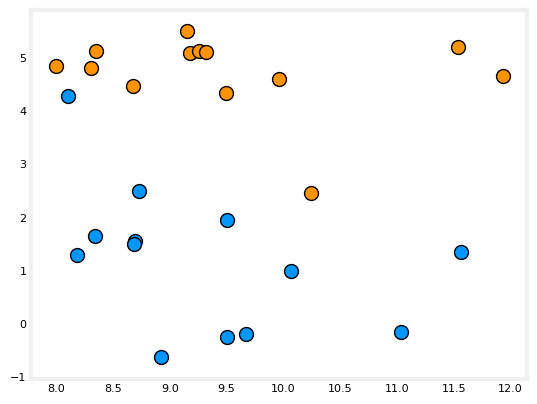

In [17]:
discrete_scatter(X[:, 0], X[:, 1], y, markers='o')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

# we rename the classes "blue" and "red" for illustration purposes
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
lc = LogisticRegression(random_state=0)
lc.fit(X_train, y_train_named)

LogisticRegression(random_state=0)

### The Decision Function

In [19]:
print(f"X_test.shape: {X_test.shape}")
print(f"Decision function shape: {lc.decision_function(X_test).shape}")

X_test.shape: (7, 2)
Decision function shape: (7,)


In [20]:
# show the first few entries of decision_function
lc.decision_function(X_test)

array([ 3.46, -3.59,  1.28, -3.89,  1.52, -1.28, -3.3 ])

In [21]:
lc.decision_function(X_test) > 0

array([ True, False,  True, False,  True, False, False])

In [22]:
lc.predict(X_test)

array(['red', 'blue', 'red', 'blue', 'red', 'blue', 'blue'], dtype='<U4')

In [23]:
lc.classes_

array(['blue', 'red'], dtype='<U4')

In [24]:
# make the boolean True/False into 0 and 1
greater_zero = (lc.decision_function(X_test) > 0).astype(int)

# use 0 and 1 as indices into classes_
pred = lc.classes_[greater_zero]

# pred is the same as the output of gbrt.predict
print(f"pred is equal to predictions: {np.all(pred == lc.predict(X_test))}")

pred is equal to predictions: True


In [29]:
decision_function = lc.decision_function(X_test)

print(f"Decision function minimum: {np.min(decision_function):.2f} maximum: {np.max(decision_function):.2f}")

Decision function minimum: -3.89 maximum: 3.46


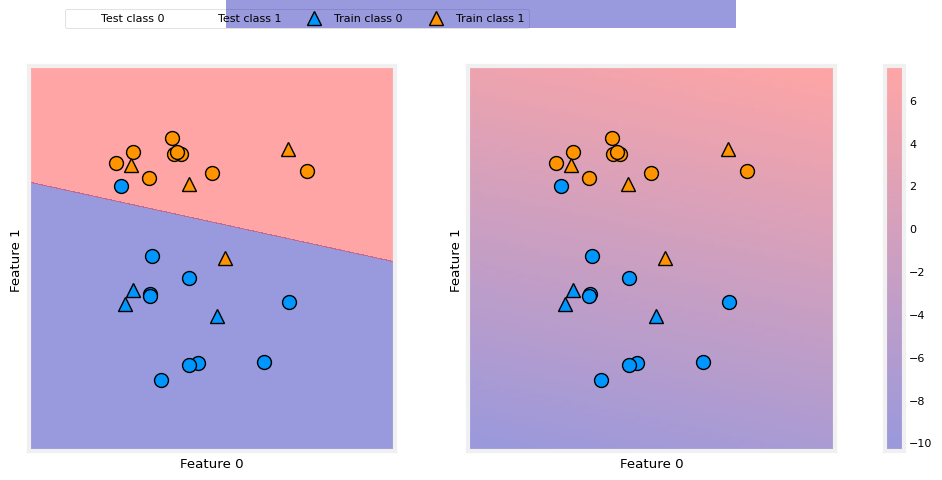

In [30]:
from helpers import tools
from helpers import plot_helpers

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

tools.plot_2d_separator(lc, X, ax=axes[0], alpha=.4, fill=True, cm=plot_helpers.cm2)

scores_image = tools.plot_2d_scores(lc, X, ax=axes[1], alpha=.4, cm=plot_helpers.ReBl)


for ax in axes:
    # plot training and test points
    discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
plt.rcParams['axes.grid'] = False
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))
plt.show()

### Predicting Probabilities

In [31]:
lc.predict_proba(X_test).shape

(7, 2)

In [32]:
lc.predict_proba(X_test)

array([[0.03, 0.97],
       [0.97, 0.03],
       [0.22, 0.78],
       [0.98, 0.02],
       [0.18, 0.82],
       [0.78, 0.22],
       [0.96, 0.04]])

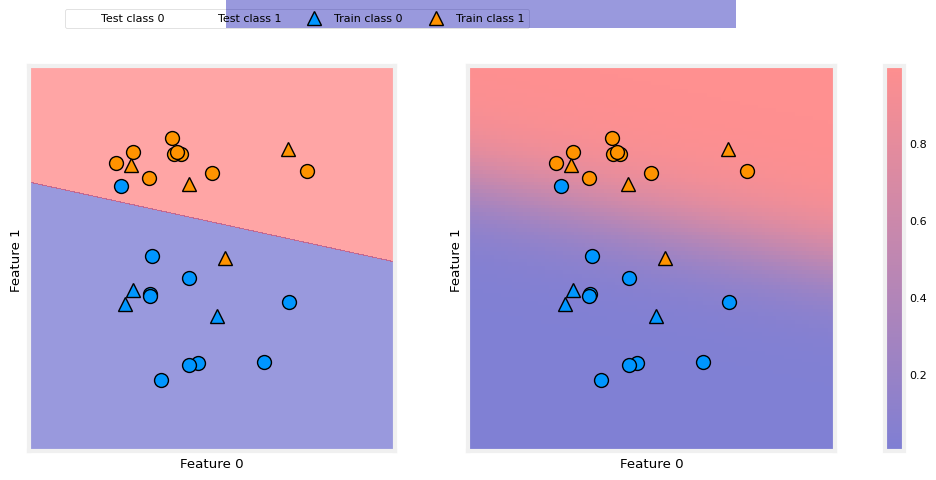

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5)) 

tools.plot_2d_separator(lc, X, ax=axes[0], alpha=.4, fill=True, cm=plot_helpers.cm2)
scores_image = tools.plot_2d_scores(lc, X, ax=axes[1], alpha=.5, cm=plot_helpers.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

plt.rcParams['axes.grid'] = False
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))
plt.show()

## Binary Logistic Regression in Scikit-learn

In [34]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("data/diabetes.csv", header=None, names=col_names)

In [35]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima["label"] # Target variable

In [37]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [38]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train_scaled, y_train)

logreg.score(X_test_scaled, y_test)

0.8177083333333334

## Linear models for multiclass classification

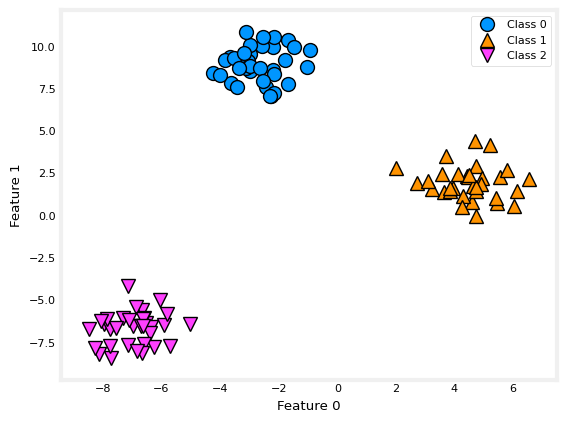

In [39]:
from sklearn.datasets import make_blobs
from helpers.tools import discrete_scatter

X, y = make_blobs(random_state=42)

discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [40]:
linear_lr = LogisticRegression().fit(X, y)

print("Coefficient shape: ", linear_lr.coef_.shape)
print("Intercept shape: ", linear_lr.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


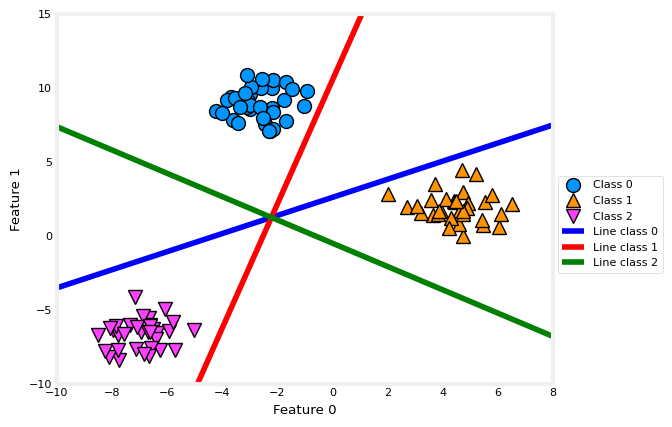

In [41]:
discrete_scatter(X[:, 0], X[:, 1], y)

line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_lr.coef_, linear_lr.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))
plt.show()

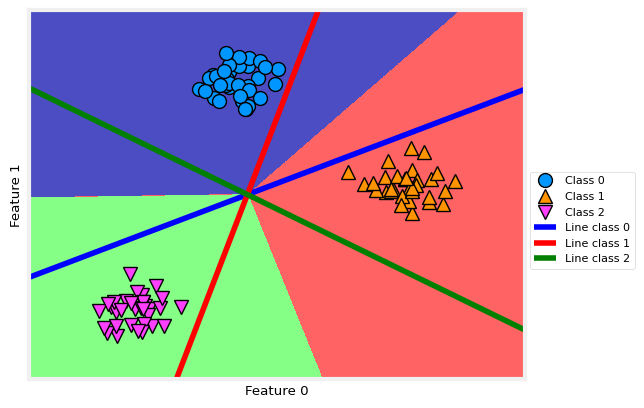

In [42]:
from helpers.plot_2d_separator import plot_2d_classification

plot_2d_classification(linear_lr, X, fill=True, alpha=.7)
discrete_scatter(X[:, 0], X[:, 1], y)

line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_lr.coef_, linear_lr.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

> All classifiers in scikit-learn do multiclass classification out-of-the-box. You don’t need to use the sklearn.multiclass module unless you want to experiment with different multiclass strategies.

## Uncertainty in Multiclass Classification

In [43]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(random_state=0)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [44]:
lr.decision_function(X_test_scaled).shape

(38, 3)

In [45]:
lr.decision_function(X_test_scaled)[:6, :]

array([[-1.05,  0.84,  0.21],
       [ 1.99,  0.13, -2.12],
       [-3.84,  1.04,  2.8 ],
       [-1.15,  0.72,  0.44],
       [-1.55,  0.86,  0.69],
       [ 1.83,  0.34, -2.17]])

In [46]:
np.argmax(lr.decision_function(X_test_scaled), axis=1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [ ]:
lr.predict(X_test_scaled)

In [47]:
#show the first few entries of predict_proba
print(f"Predicted probabilities:\n{lr.predict_proba(X_test_scaled)[:6]}")
# show that sums across rows are one
print(f"Sums: {lr.predict_proba(X_test_scaled)[:6].sum(axis=1)}")

Predicted probabilities:
[[0.09 0.59 0.32]
 [0.85 0.13 0.01]
 [0.   0.15 0.85]
 [0.08 0.52 0.4 ]
 [0.05 0.52 0.44]
 [0.8  0.18 0.01]]
Sums: [1. 1. 1. 1. 1. 1.]


In [48]:
np.argmax(lr.predict_proba(X_test_scaled), axis=1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [49]:
lr.predict(X_test_scaled)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [50]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]

logreg.fit(X_train_scaled, named_target)

print(f"unique classes in training data: {logreg.classes_}")
print(f"predictions: {logreg.predict(X_test_scaled)[:10]}")

argmax_dec_func = np.argmax(logreg.decision_function(X_test_scaled), axis=1)
print(f"argmax of decision function: {argmax_dec_func[:10]}")
print(f"argmax combined with classes_: {logreg.classes_[argmax_dec_func][:10]}")

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


## Multinomial Logistic Regression in Scikit-learn

- [OpenML](https://www.openml.org/): A worldwide machine learning lab
- [Kaggle](https://www.kaggle.com/)

In [51]:
from sklearn.datasets import load_digits
digits = load_digits()

In [53]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


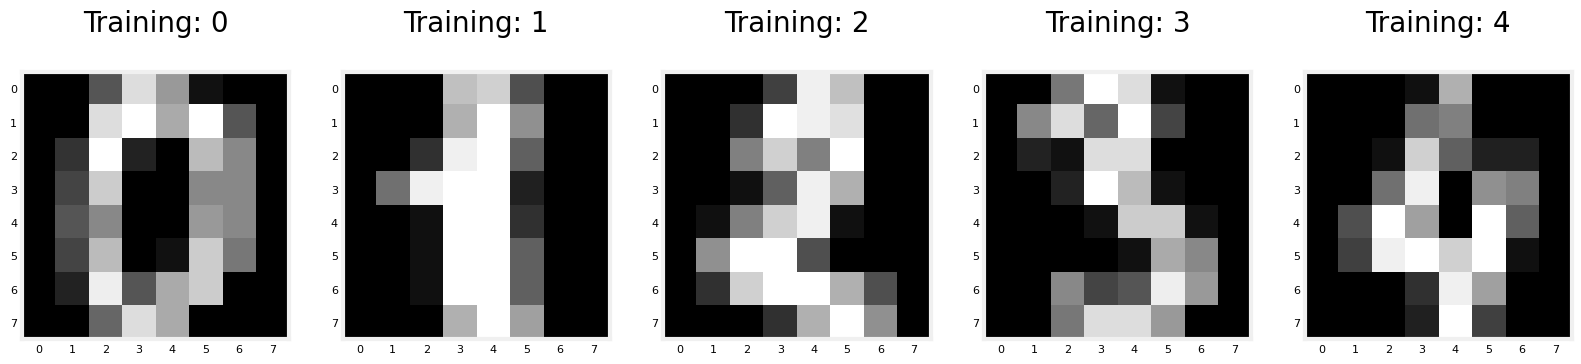

In [54]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [56]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [57]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334
